## PROJETO - Análise e Prevenção de Acidentes no Ambiente de Trabalho
### Coleta, Análise, Tratamento e Visualização de Dados)

## Dicionário de Dados

<br>**ID_ACIDENTE**                    -- Identificando o número do acidente
<br>**DATA**                           -- Data do acidente
<br>**SETOR**                          -- Setor onde o acidente ocorreu
<br>**TIPO_ACIDENTE**                  -- Tipo de acidente ocorrido
<br>**GRAVIDADE**                      -- gravidade do acidente
<br>**DIAS_AFASTADO**                  -- Dias do afastamento do acidentado
<br>**TURNO**                          -- horário (manhã, tarde, noite)


## 1 - Definição do objetivo
<p> Criar um Dashboard em Power BI para Análise de Dados e realizar o tratamento, analise e visualização dos dados


### **Sobre o Projeto:**

A segurança no trabalho desempenha um papel fundamental na preservação da integridade física dos trabalhadores e na continuidade das operações produtivas. A análise dos acidentes ocorridos em determinado período revelou que os acidentes por corte representam a maior ocorrência, seguidos por quedas, impactos e queimaduras. Esse diagnóstico é essencial para direcionar ações preventivas, treinar equipes e aprimorar processos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregar aquivo CSV
df = pd.read_csv("acidentes_estatistica.csv")
df.head(20)

,id_acidente,data,setor,tipo_acidente,gravidade,dias_afastado,turno
0,1,2024-01-07,Produção,Corte,Leve,0,Manhã
1,2,2024-01-14,Manutenção,Queda,Moderado,3,Tarde
2,3,2024-01-21,Logística,Impacto,Leve,0,Noite
3,4,2024-01-28,Administrativo,Queimadura,Grave,15,Manhã
4,5,2024-02-04,Produção,Corte,Leve,0,Noite
5,6,2024-02-11,Logística,Impacto,Leve,0,Tarde
6,7,2024-02-18,Manutenção,Queda,Moderado,5,Manhã
7,8,2024-02-25,Produção,Corte,Leve,0,Noite
8,9,2024-03-03,Administrativo,Queimadura,Grave,20,Tarde
9,10,2024-03-10,Logística,Impacto,Leve,0,Manhã


In [3]:
# Visualizando as ultimas linhas do DataFrame
df.tail()

,id_acidente,data,setor,tipo_acidente,gravidade,dias_afastado,turno
15,16,2024-04-21,Produção,Corte,Leve,0,Noite
16,17,2024-04-28,Manutenção,Queda,Moderado,8,Tarde
17,18,2024-05-05,Produção,Impacto,Leve,0,Manhã
18,19,2024-05-12,Logística,Corte,Moderado,2,Tarde
19,20,2024-05-19,Administrativo,Queimadura,Grave,25,Noite


In [4]:
# Exibe a dimensão do DataFrame 
# Linhas e Colunas contidas no DataFrame
df.shape

(20, 7)

In [5]:
# Exibe informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_acidente    20 non-null     int64 
 1   data           20 non-null     object
 2   setor          20 non-null     object
 3   tipo_acidente  20 non-null     object
 4   gravidade      20 non-null     object
 5   dias_afastado  20 non-null     int64 
 6   turno          20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB


In [6]:
# Exibe medidas estatísticas básicas para nosso DataFrame
df.describe()

,id_acidente,dias_afastado
count,20.00000,20.000000
mean,10.50000,6.250000
std,5.91608,9.095256
min,1.00000,0.000000
25%,5.75000,0.000000
50%,10.50000,2.500000
75%,15.25000,7.250000
max,20.00000,30.000000


In [7]:
# Exibe o nome das colunas do DataFrame
df.columns

Index(['id_acidente', 'data', 'setor', 'tipo_acidente', 'gravidade',
       'dias_afastado', 'turno'],
      dtype='object')

In [8]:
# Realiza a contagem valores nulos (dados missing / valores ausentes / Valores NaN) no DataFrame
df.isnull().sum()

id_acidente      0
data             0
setor            0
tipo_acidente    0
gravidade        0
dias_afastado    0
turno            0
dtype: int64

In [9]:
# Exibe informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_acidente    20 non-null     int64 
 1   data           20 non-null     object
 2   setor          20 non-null     object
 3   tipo_acidente  20 non-null     object
 4   gravidade      20 non-null     object
 5   dias_afastado  20 non-null     int64 
 6   turno          20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB


In [10]:
df['data'] = pd.to_datetime(df['data'])# transforma em datetime

In [11]:
# Exibe informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_acidente    20 non-null     int64         
 1   data           20 non-null     datetime64[ns]
 2   setor          20 non-null     object        
 3   tipo_acidente  20 non-null     object        
 4   gravidade      20 non-null     object        
 5   dias_afastado  20 non-null     int64         
 6   turno          20 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.2+ KB


In [12]:
acidentes_por_setor = df['setor'].value_counts()
acidentes_por_gravidade = df['gravidade'].value_counts()
media_dias_afastado = df['dias_afastado'].mean()

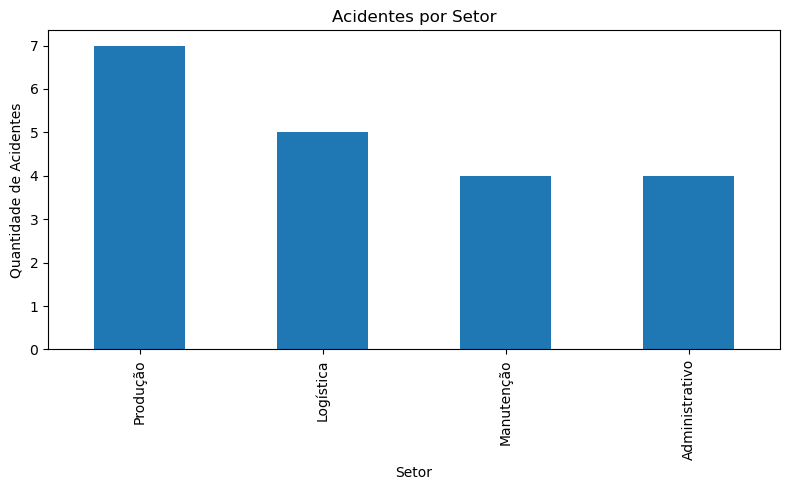

In [13]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
acidentes_por_setor.plot(kind="bar")
plt.xlabel("Setor")
plt.ylabel("Quantidade de Acidentes")
plt.title("Acidentes por Setor")
plt.tight_layout()

> <font color="blue">Acidente por setor.</red>

- A análise dos dados de acidentes de trabalho evidencia que o setor de **Produção** apresentou o maior número de ocorrências, destacando-se como a área de maior criticidade no período analisado.
- Em segundo lugar, o setor de **Logística** também apresentou um índice significativo de acidentes, influenciado principalmente pelas atividades de movimentação de cargas, utilização de empilhadeiras e circulação contínua em áreas com grande fluxo de materiais e pessoas.
- Na terceira posição, observam-se os setores de **Manutenção** e **Administração**, que apresentaram quantidades semelhantes de acidentes. No caso da Manutenção, os riscos envolvem intervenções em máquinas, trabalho em altura e contato com partes energizadas. Já na Administração, embora o ambiente seja menos operacional, ainda ocorrem incidentes relacionados a ergonomia, quedas e deslocamentos internos.

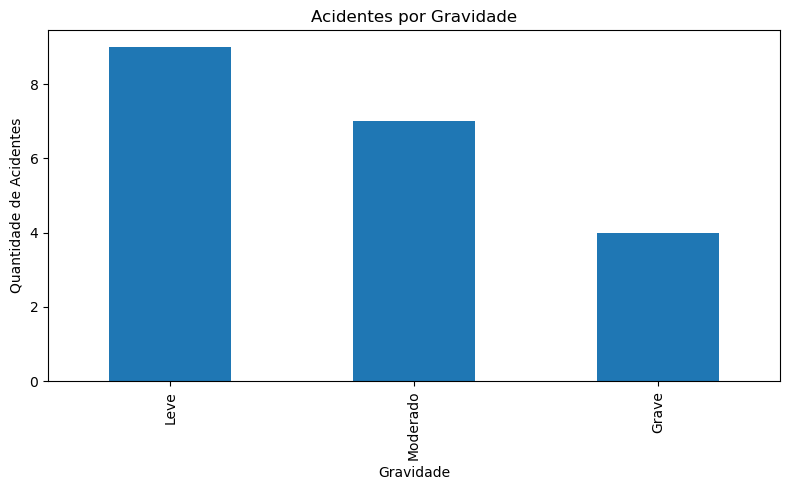

In [14]:
plt.figure(figsize=(8, 5))
acidentes_por_gravidade.plot(kind="bar")
plt.xlabel("Gravidade")
plt.ylabel("Quantidade de Acidentes")
plt.title("Acidentes por Gravidade")
plt.tight_layout()

> <font color="blue">Acidente por gravidade.</red>

- A avaliação dos acidentes registrados demonstra que a maioria das ocorrências foi classificada como de **gravidade leve**, representando a parte mais significativa dos eventos. Esse resultado indica que, embora os acidentes estejam acontecendo, suas consequências imediatas geralmente envolvem lesões simples, de rápida recuperação e sem afastamento prolongado.
- Em segundo lugar, encontram-se os acidentes de **gravidade moderada**, que exigem maior atenção por envolverem lesões que podem demandar intervenções médicas mais específicas, curtos períodos de afastamento e impacto direto na capacidade produtiva.
- Por fim, os acidentes de **gravidade grave** foram os menos frequentes. Apesar da baixa incidência, esse tipo de ocorrência possui alto potencial de provocar danos sérios à saúde do trabalhador, além de representar riscos significativos para a empresa, como afastamentos prolongados, custos elevados e impacto na imagem institucional.

In [15]:
# Criar colunas de dia e mês
df['dia'] = df['data'].dt.day
df['mes'] = df['data'].dt.month

In [16]:
df.head(5)

,id_acidente,data,setor,tipo_acidente,gravidade,dias_afastado,turno,dia,mes
0,1,2024-01-07,Produção,Corte,Leve,0,Manhã,7,1
1,2,2024-01-14,Manutenção,Queda,Moderado,3,Tarde,14,1
2,3,2024-01-21,Logística,Impacto,Leve,0,Noite,21,1
3,4,2024-01-28,Administrativo,Queimadura,Grave,15,Manhã,28,1
4,5,2024-02-04,Produção,Corte,Leve,0,Noite,4,2


In [30]:
# df.to_excel('meu_dataset.xlsx', index=False) # salva o dataframen

In [17]:
# Contar acidentes por setor (substitua 'setor' pela sua variável)
acidentes_por_setor = df['setor'].value_counts()
acidentes_por_setor

setor
Produção          7
Logística         5
Manutenção        4
Administrativo    4
Name: count, dtype: int64

In [18]:
# Contar dia de acidentes 
acidentes_por_dia = df['dia'].value_counts()
acidentes_por_dia

dia
7     2
14    2
21    2
28    2
4     1
11    1
18    1
25    1
3     1
10    1
17    1
24    1
31    1
5     1
12    1
19    1
Name: count, dtype: int64

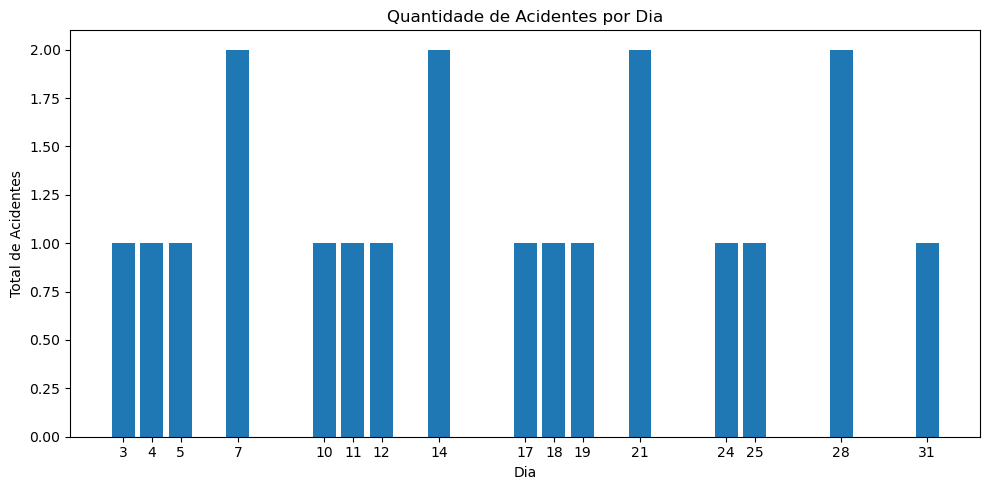

In [19]:
# Gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(acidentes_por_dia.index, acidentes_por_dia.values)

plt.title('Quantidade de Acidentes por Dia')
plt.xlabel('Dia')
plt.ylabel('Total de Acidentes')
plt.xticks(acidentes_por_dia.index)
plt.tight_layout()
plt.show()

> <font color="blue">Quantidade de acidente por dia no mês de janeiro.</red>

- A análise da distribuição dos acidentes ao longo do mês de janeiro revela três dias com destaque significativo no número de ocorrências: dia 7, dia 14 e dia 28. Esses picos indicam momentos específicos em que houve maior concentração de acidentes, sugerindo a necessidade de uma investigação mais aprofundada sobre fatores operacionais, comportamentais ou organizacionais que possam ter influenciado esses registros.

In [20]:
df_group = df.groupby(['mes', 'tipo_acidente']).size().reset_index(name='total_acidentes')
df_group

,mes,tipo_acidente,total_acidentes
0,1,Corte,1
1,1,Impacto,1
2,1,Queda,1
3,1,Queimadura,1
4,2,Corte,2
5,2,Impacto,1
6,2,Queda,1
7,3,Corte,1
8,3,Impacto,2
9,3,Queda,1


In [21]:
pd.crosstab(df['setor'], df['tipo_acidente'], margins=True)

tipo_acidente,Corte,Impacto,Queda,Queimadura,All
setor,,,,,
Administrativo,0,0,0,4,4
Logística,1,3,1,0,5
Manutenção,0,0,4,0,4
Produção,5,2,0,0,7
All,6,5,5,4,20


In [22]:
pd.crosstab([df['setor'], df['gravidade']], df['tipo_acidente'])

tipo_acidente             Corte  Impacto  Queda  Queimadura
setor          gravidade                                   
Administrativo Grave          0        0      0           4
Logística      Leve           0        3      0           0
               Moderado       1        0      1           0
Manutenção     Moderado       0        0      4           0
Produção       Leve           4        2      0           0
               Moderado       1        0      0           0

<Figure size 1200x600 with 0 Axes>

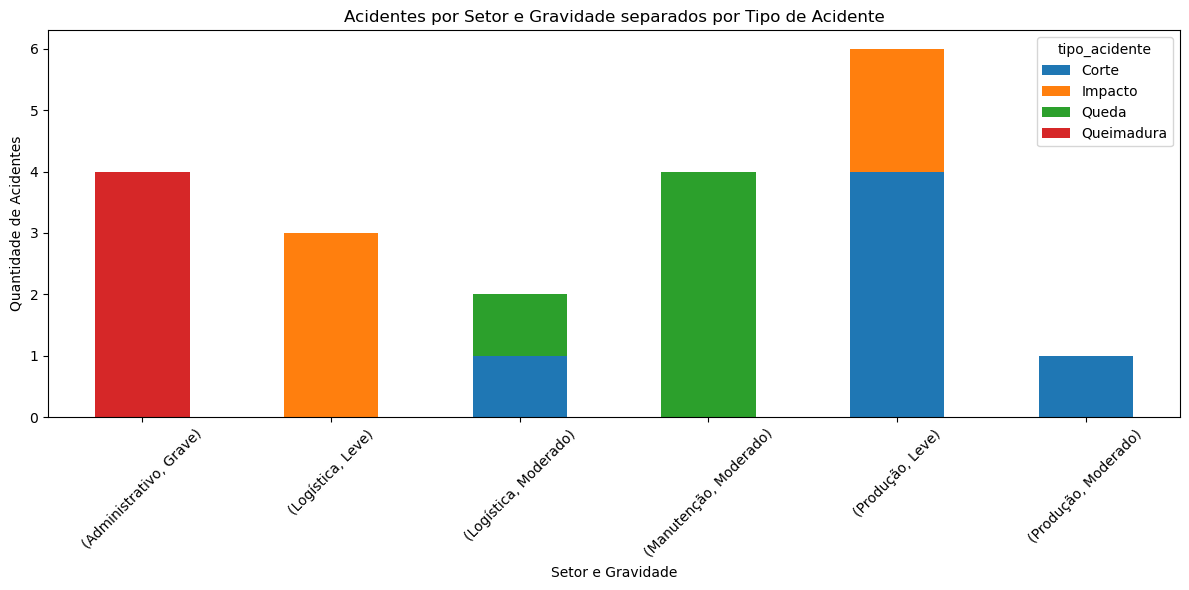

In [23]:
# Criar gráfico de barras empilhadas
tabela = pd.crosstab([df['setor'], df['gravidade']], df['tipo_acidente'])
plt.figure(figsize=(12, 6))
tabela.plot(kind='bar', stacked=True, figsize=(12,6))

# Títulos e legendas
plt.title('Acidentes por Setor e Gravidade separados por Tipo de Acidente')
plt.xlabel('Setor e Gravidade')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> <font color="blue">Relação entre Tipo de Acidente e Setor</red>

- No setor de **Produção**, o acidente por *corte* apresenta a maior relevância, refletindo a forte presença de atividades manuais, manuseio de ferramentas cortantes e operações com máquinas. Além disso, também foi registrado índice significativo de acidentes por impacto, reforçando a necessidade de revisão de procedimentos e reforço no uso adequado de EPIs.
- No setor de **Manutenção**, o risco predominante é o de *queda*, classificado principalmente como de gravidade moderada. Essa característica está relacionada a trabalhos em altura, intervenções em equipamentos, deslocamentos em áreas técnicas e manipulação de estruturas elevadas, evidenciando a importância de treinamentos e conformidade com a NR 35.
- No setor **Administrativo**, apesar de ser um ambiente menos operacional, o destaque recai sobre o risco grave de *queimadura*, associado a incidentes pontuais envolvendo equipamentos eletrônicos, sobrecarga de dispositivos ou falhas em sistemas de energia. A baixa frequência, porém alta severidade, exige atenção redobrada.

Ranking dos tipos de acidente:
tipo_acidente
Corte         6
Queda         5
Impacto       5
Queimadura    4
Name: count, dtype: int64


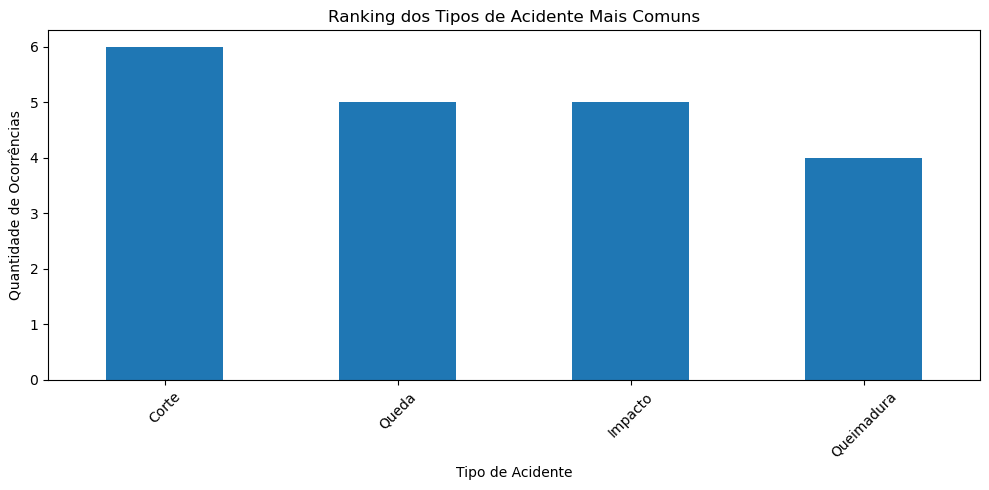

In [24]:
# Ranking dos tipos de acidente
ranking_tipos = df['tipo_acidente'].value_counts()

print("Ranking dos tipos de acidente:")
print(ranking_tipos)

# Gráfico do ranking
plt.figure(figsize=(10, 5))
ranking_tipos.plot(kind='bar')

plt.title('Ranking dos Tipos de Acidente Mais Comuns')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> <font color="blue">Tipos de Acidentes Mais Comuns</red>

- A análise dos registros de segurança demonstra que o acidente por **corte** é o tipo mais frequente, **ocupando a primeira posição** entre as ocorrências. Esse dado evidencia maior exposição dos trabalhadores a ferramentas cortantes, máquinas com partes móveis e tarefas manuais que exigem precisão, reforçando a necessidade de controles mais rigorosos, treinamentos e EPIs específicos.
- **Em segundo lugar**, destacam-se os acidentes por **queda**, relacionados tanto a escorregões em nível quanto a trabalhos em altura. Esses eventos indicam a importância de inspeções regulares, melhorias na organização dos setores e reforço nas práticas de prevenção definidas em normas como NR 35 e NR 11.
- **O terceiro** tipo de acidente mais comum é o **impacto**, envolvendo choques com objetos, colisões com equipamentos ou movimentação de cargas. Esse padrão sugere a necessidade de aperfeiçoar a circulação interna, garantir sinalização adequada e orientar os trabalhadores sobre consciência situacional.

In [26]:
mais_frequente = df['turno'].value_counts().idxmax()
mais_frequente

'Manhã'

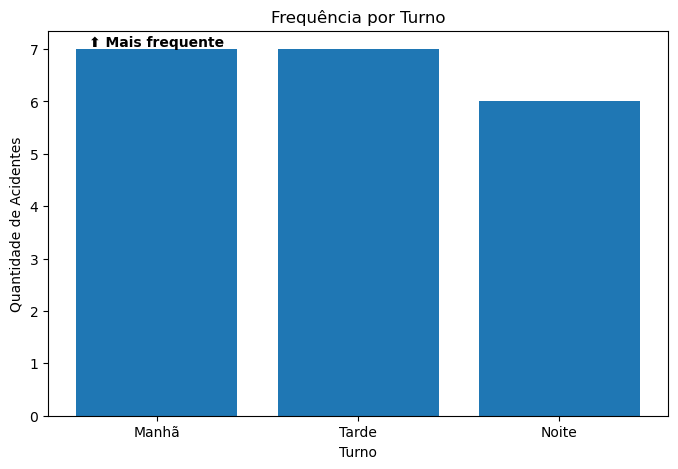

O turno com maior frequência é: Manhã


In [28]:
# Frequência dos turnos
frequencia_turno = df['turno'].value_counts()

# Turno mais frequente
mais_frequente = df['turno'].value_counts().idxmax()

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.bar(frequencia_turno.index, frequencia_turno.values)

# Título e rótulos
plt.title('Frequência por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Acidentes')

# Destacar o turno mais frequente
plt.text(
    x=mais_frequente,
    y=frequencia_turno[mais_frequente],
    s='⬆ Mais frequente',
    ha='center',
    va='bottom',
    fontsize=10,
    weight='bold'
)

plt.show()

# Mostrar qual é o mais frequente
print("O turno com maior frequência é:", mais_frequente)

> <font color="blue">Frequência de Acidentes por Turno</red>

- A análise da frequência de acidentes por turno revela que o turno da **manhã** concentra o maior número de ocorrências. Esse comportamento pode estar relacionado ao início das atividades operacionais, quando há maior movimentação, ajustes iniciais de máquinas, maior volume de tarefas e adaptação dos trabalhadores ao ritmo de trabalho.
  Além disso, o início do dia costuma envolver rotinas mais intensas de produção e logística, o que aumenta a exposição a **riscos mecânicos**, **ergonômicos** e **operacionais**. Esse resultado reforça a importância de fortalecer práticas preventivas justamente nesse período, como:
- **DDS mais direcionados logo no início do turno**;
- **Verificação preventiva de máquinas e ferramentas**;
- **Reforço da atenção situacional nas primeiras horas de trabalho**;
- **Acompanhamento mais próximo das equipes durante as atividades iniciais**.

### Conclusão do Projeto

A análise do conjunto de dados credito.csv permitiu compreender melhor o perfil dos clientes e os fatores associados ao limite de crédito, aos padrões de consumo e às características demográficas. Observou-se que, embora existam diferenças nos limites concedidos, principalmente entre homens e mulheres, o comportamento de gastos ao longo de 12 meses permanece relativamente semelhante entre os sexos. A distribuição dos limites também revelou que clientes com cartão platinum tendem a não aparecer entre os menores limites, indicando critérios mais seletivos para esse tipo de cartão.

Além disso, a escolaridade não demonstrou relação clara com o valor do limite ou com o tipo de cartão, sugerindo que esses fatores podem estar mais associados a variáveis como renda ou histórico de crédito. Em contrapartida, a análise por tipo de cartão mostrou diferenças relevantes na quantidade de clientes em cada categoria, com alguns tipos sendo muito mais populares do que outros.

A associação entre faixa salarial, limite de crédito e volume de transações também trouxe insights importantes: faixas salariais mais altas tendem a apresentar maiores limites e maior movimentação financeira, indicando maior capacidade de compra e maior utilização dos serviços do cartão.

De forma geral, o dataset oferece uma visão ampla sobre o comportamento financeiro dos clientes, permitindo identificar perfis de risco, potenciais públicos para upsell de cartões e padrões que podem orientar estratégias de crédito, marketing e fidelização. A combinação de dados demográficos, financeiros e de uso permite uma análise rica e aplicável a diversas tomadas de decisão dentro do contexto de serviços financeiros.